<a href="https://colab.research.google.com/github/RodrigoMR13/Escola-DNC/blob/main/Exercicio_Pr%C3%A9_Processamento_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregamento das Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# from google.colab import drive (usariamos essa biblioteca caso fosse necessário importar o dataset do google drive)

# Carregamento dos Dados


In [ ]:
df = pd.read_csv('50_Startups.csv', sep=',')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# EDA

## Estatísticas Descritivas

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Análise Gráfica

### Nome das colunas

In [ ]:
contColNames = list(df.select_dtypes(include='number').columns)

### Configurar tamanho do subplot


In [ ]:
ncols = 3

In [ ]:
nrows = int(np.ceil(len(contColNames)/(1.0*ncols)))

### Plotar os Histogramas

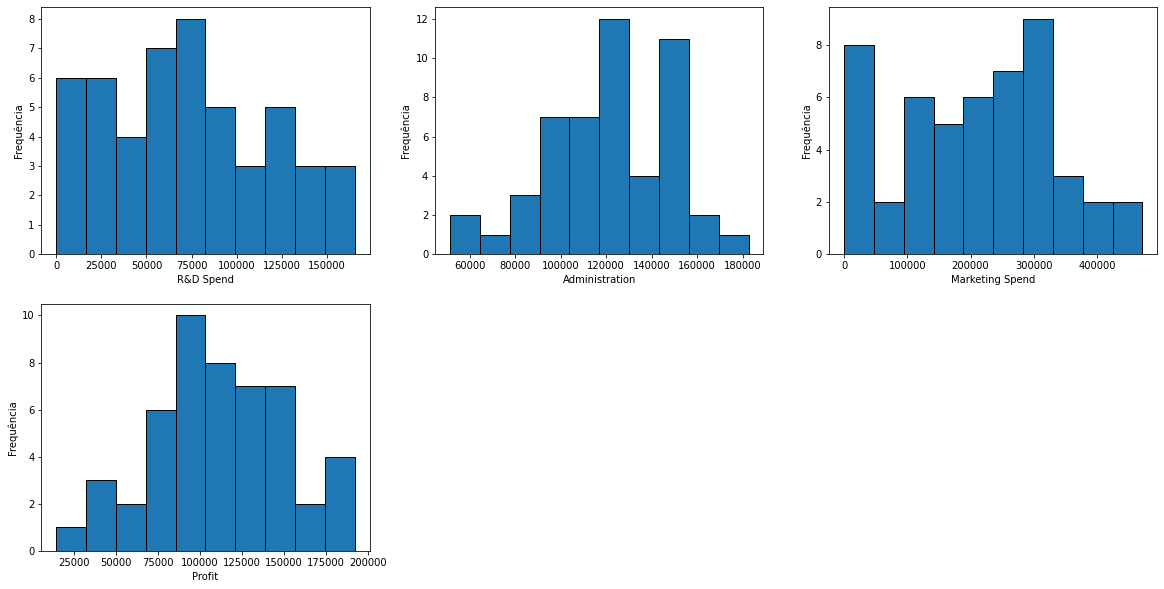

In [ ]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

counter = 0

for i in range(nrows):
  for j in range(ncols):

    ax = axes[i][j]

    #Plotar somente quando houver dados
    if counter < len(contColNames):

      ax.hist(df.select_dtypes(include='number')[contColNames[counter]], bins=10, edgecolor='black')
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')

    else:
      ax.set_axis_off()
    
    counter += 1
  
plt.show()

### Plotar o Gráfico de Barras

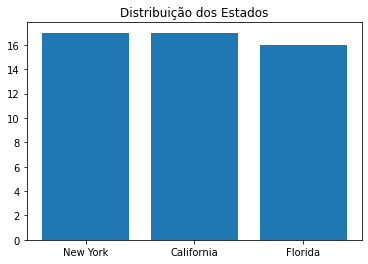

In [ ]:
fig = plt.figure()

plt.bar(df['State'].unique(), df['State'].value_counts())

plt.title('Distribuição dos Estados')

plt.show()

### Plotar Gráfico de Correlação


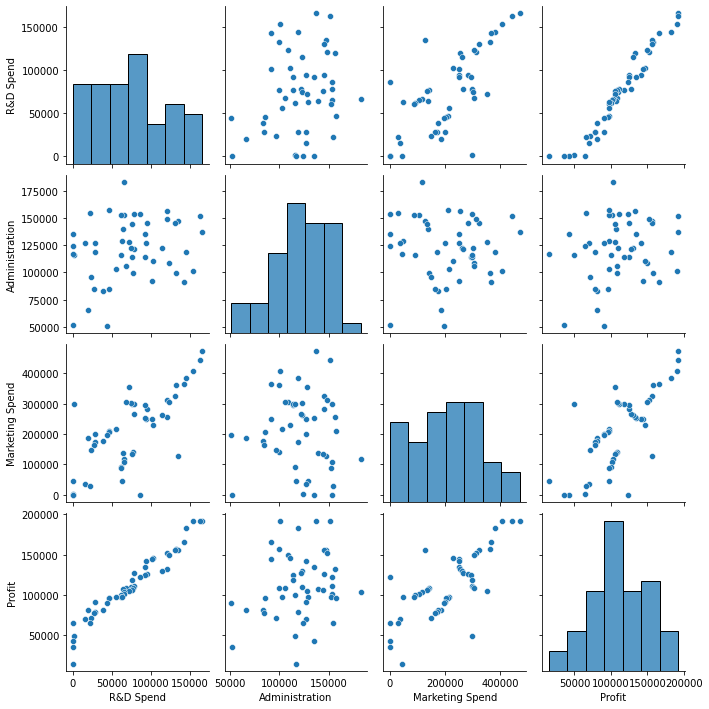

In [ ]:
sns.pairplot(df)

### Plotar o Boxplot

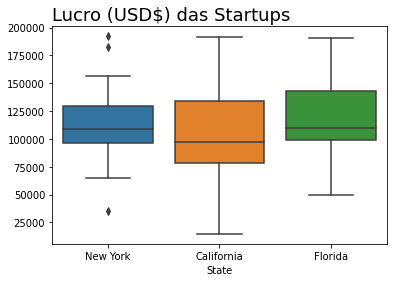

In [ ]:
fig = plt.figure()

sns.boxplot(x=df['State'], y=df['Profit'])

plt.title('Lucro (USD$) das Startups', fontsize=18, fontweight=18, loc='left')

plt.ylabel('')

plt.show()

# Pré-Processamento dos Dados 

## Separar as Variáveis

### Variáveis Contínuas

In [ ]:
dfNum = df.select_dtypes(include='number').drop(columns='Profit')

In [ ]:
dfNum.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


### Variáveis Categóricas

In [ ]:
# Mudar o tipo de variável para categórica
df['State'] = df['State'].astype('category')

# Selecionar somente as variáveis categóricas
dfCat = df.select_dtypes(include='category')

In [ ]:
dfCat.head()

,State
0,New York
1,California
2,Florida
3,New York
4,Florida


### Resposta

In [ ]:
y = df['Profit']

## Pré-Tratamento da Resposta

### Teste Resposta Original

In [ ]:
kStat, kPvalue = sp.stats.kstest(rvs=y, cdf='norm')

In [ ]:
kStat

1.0

In [ ]:
kPvalue

0.0

### Teste Log da Resposta

In [ ]:
kStat, kPvalue = sp.stats.kstest(rvs=np.log(y), cdf='norm')

In [ ]:
kStat

1.0

In [ ]:
kPvalue

0.0

(array([ 1.,  0.,  0.,  1.,  2.,  2.,  6., 17., 11., 10.]),
 array([ 9.59433667,  9.85156434, 10.10879202, 10.36601969, 10.62324737,
        10.88047504, 11.13770272, 11.39493039, 11.65215807, 11.90938574,
        12.16661342]),
 <a list of 10 Patch objects>)

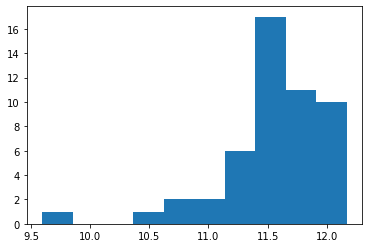

In [ ]:
fig = plt.figure()
plt.hist(np.log(y))

## Pré-Tratamento das Variáveis Contínuas

In [ ]:
# Criar a função para o escalonamento dos dados
def feat_scale(X):

  # Calcular a média de todas as variáveis
  mu = np.mean(X, axis=0)
  
  # Calcular o desvio padrão de todas as variáveis
  sigma = np.std(X, axis=0, ddof=1)

  # Fazer o escalonamento das variáveis

  xNorm = (X - mu)/sigma
  
  return xNorm

In [ ]:
dfNorm = feat_scale(dfNum)

In [ ]:
dfNorm.head()

,R&D Spend,Administration,Marketing Spend
0,1.996146,0.555117,2.132295
1,1.936203,1.071924,1.904267
2,1.736731,-0.720938,1.610180
3,1.539157,-0.095396,1.407916
4,1.489812,-1.069066,1.268648


## Pré-Tratamento das Variáveis Categóricas

In [ ]:
dfDum = pd.get_dummies(dfCat)

In [ ]:
dfDum.head()

,State_California,State_Florida,State_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [ ]:
dfFinal = pd.concat([dfNorm, dfDum], axis=1)

In [ ]:
dfFinal.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,1.996146,0.555117,2.132295,0,0,1
1,1.936203,1.071924,1.904267,1,0,0
2,1.736731,-0.720938,1.610180,0,1,0
3,1.539157,-0.095396,1.407916,0,0,1
4,1.489812,-1.069066,1.268648,0,1,0
